# Analysis of sold new cars in Estonia 2024

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [170]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [171]:
from mnt_sum import (
    get_summary,
    COLUMNS,
    PRIVATE_CUSTOMER,
    COLUMN_SHORT_NAME,
    COLUMN_CUSTOMER,
    COLUMN_CITY,
)

df_o = get_summary("data/2024")
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC,CO2_WLTP,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv
count,3976.0,3976.000000,3976.000000,157.000000,3798.000000,3976.000000,3976.0,3976.000000,3976.000000,3976.000000,3976.000000
mean,2024.0,128.858023,1791.909708,99.254777,143.934966,5.138581,2.0,2216.602616,1745.441147,2216.602616,1.193159
std,0.0,67.195780,788.903170,70.514311,53.881436,0.735897,0.0,437.185343,393.461955,437.185343,1.084094
min,2024.0,18.600000,0.000000,0.000000,0.000000,2.000000,2.0,1300.000000,984.000000,1300.000000,1.000000
25%,2024.0,96.000000,1490.000000,0.000000,122.000000,5.000000,2.0,1910.000000,1463.500000,1910.000000,1.000000
50%,2024.0,110.000000,1798.000000,121.000000,137.000000,5.000000,2.0,2143.500000,1679.000000,2143.500000,1.000000
75%,2024.0,139.250000,1995.000000,133.000000,167.750000,5.000000,2.0,2419.000000,1893.000000,2419.000000,1.000000
max,2024.0,607.000000,6749.000000,263.000000,393.000000,9.000000,2.0,4400.000000,3596.000000,4400.000000,32.000000


In [172]:
df_o.head()

,Kategooria,Mark,Mudel,Tüüp,Kere nimetus,Keretüüp,Esm reg aasta,Kütusekombinatsioon,Mootori tüüp,Mootori võimsus,...,Tühimass,Täismass,Värv,Käigukasti tüüp,Maakond,Linn,Tüüp (isik),Arv,name,short name
74,M1,AUDI,A1 ALLSTREET,GB,UNIVERSAAL,AC,2024,BENSIIN,BENSIIN_KATALYSAATOR,81.0,...,1289,1695,HALL,AUTOMAAT,HARJU MAAKOND,Määramata,FÜÜSILINE,2,AUDI A1 ALLSTREET,AUDI A1
75,M1,AUDI,A1 ALLSTREET,GB,UNIVERSAAL,AC,2024,BENSIIN,BENSIIN_KATALYSAATOR,81.0,...,1306,1695,VALGE,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,1,AUDI A1 ALLSTREET,AUDI A1
76,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2024,BENSIIN-ELEKTER,BENSIIN_HYBRIID,81.0,...,1371,1835,HALL,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,1,AUDI A3 SPORTBACK,AUDI A3
77,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2024,BENSIIN-ELEKTER,BENSIIN_HYBRIID,81.0,...,1371,1835,MUST,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,1,AUDI A3 SPORTBACK,AUDI A3
78,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2024,BENSIIN-ELEKTER,BENSIIN_HYBRIID,81.0,...,1394,1835,HALL,AUTOMAAT,HARJU MAAKOND,Keila,JURIIDILINE,1,AUDI A3 SPORTBACK,AUDI A3


In [173]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv
74,AUDI,A1 ALLSTREET,AUDI A1,BENSIIN_KATALYSAATOR,999,81.0,Määramata,FÜÜSILINE,2,HALL
75,AUDI,A1 ALLSTREET,AUDI A1,BENSIIN_KATALYSAATOR,999,81.0,Tallinn,JURIIDILINE,1,VALGE
76,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,Tallinn,JURIIDILINE,1,HALL
77,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,Tallinn,JURIIDILINE,1,MUST
78,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,Keila,JURIIDILINE,1,HALL


## Add additional data

In [174]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df["SUV"] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df["SUV"]].head(5)

/tmp/ipykernel_565749/968145016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv,SUV
94,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Määramata,JURIIDILINE,2,HALL,True
95,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Määramata,JURIIDILINE,1,MUST,True
96,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Määramata,JURIIDILINE,1,MUST,True
97,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Määramata,JURIIDILINE,1,SININE,True
98,AUDI,Q4 40 E-TRON,AUDI Q4,ELEKTER,0,70.0,Tallinn,JURIIDILINE,1,HALL,True


# Total sold cars

In [175]:
df["Arv"].sum()

4744

# Popular fuels

                       Arv
Mootori tüüp              
BENSIIN_HYBRIID       1871
BENSIIN_KATALYSAATOR  1429
DIISEL                 833
ELEKTER                319
DIISEL_HYBRIID         257
CNG                     35


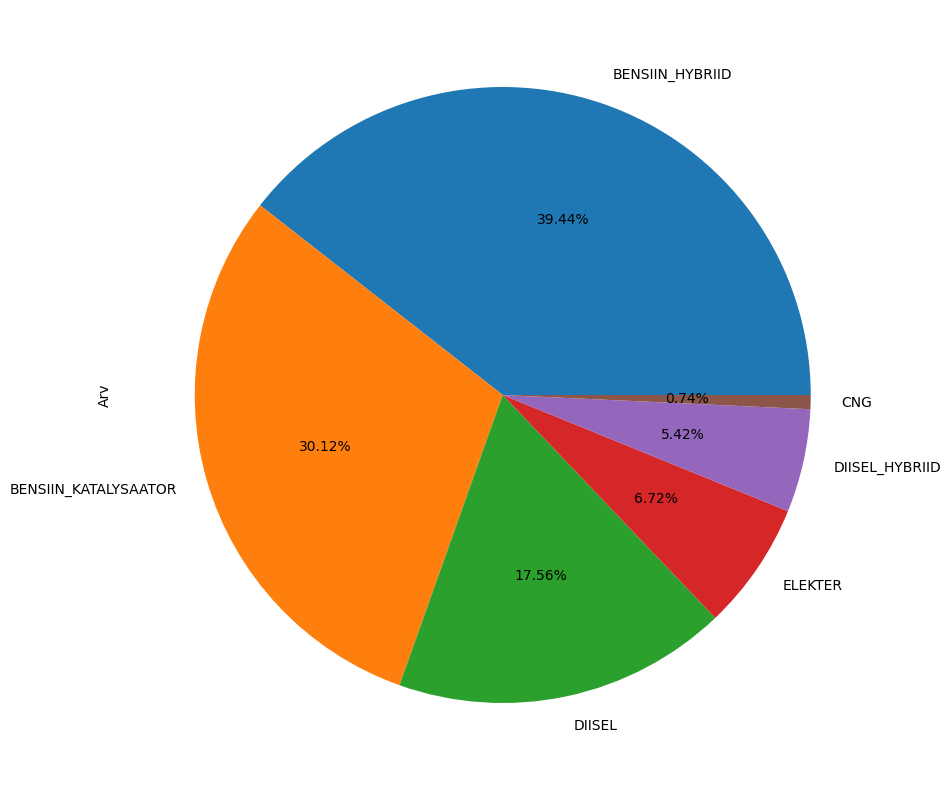

In [176]:
def show_pie(dataframe, groupby, index=None):
    plt.figure(figsize=(10, 10))
    dataframe = (
        dataframe.groupby([groupby], as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe["Arv"].plot.pie(autopct="%1.2f%%")
    print(dataframe)


show_pie(df, "Mootori tüüp")

# Popular colors

               Arv
Värv              
HALL          1450
VALGE          905
MUST           767
SININE         435
PUNANE         310
ROHELINE       217
TUMEHALL       188
HÕBEDANE       114
PRUUN           66
BEEŽ            64
ORANŽ           46
TUMESININE      38
KOLLANE         30
TUMEPUNANE      24
LILLA           21
HELESININE      13
HELEHALL        12
KULDNE          10
HELEROHELINE    10
TUMEROHELINE     6
HELEPRUUN        5
HELEBEEŽ         5
TUMEPRUUN        5
ROOSA            3


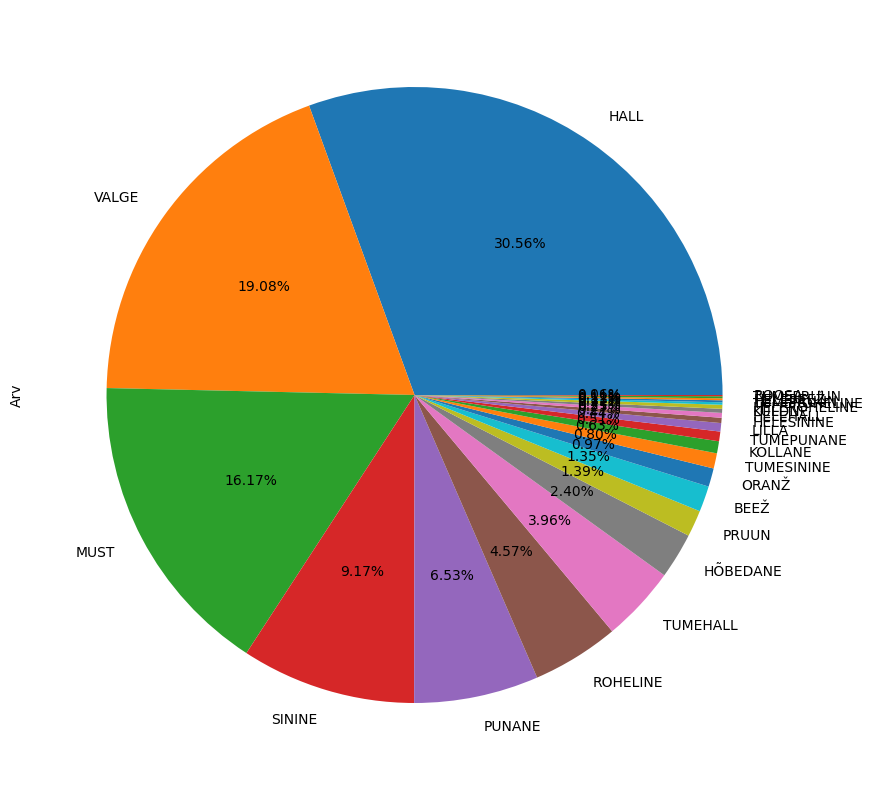

In [177]:
show_pie(df, "Värv")

# Engine capacities

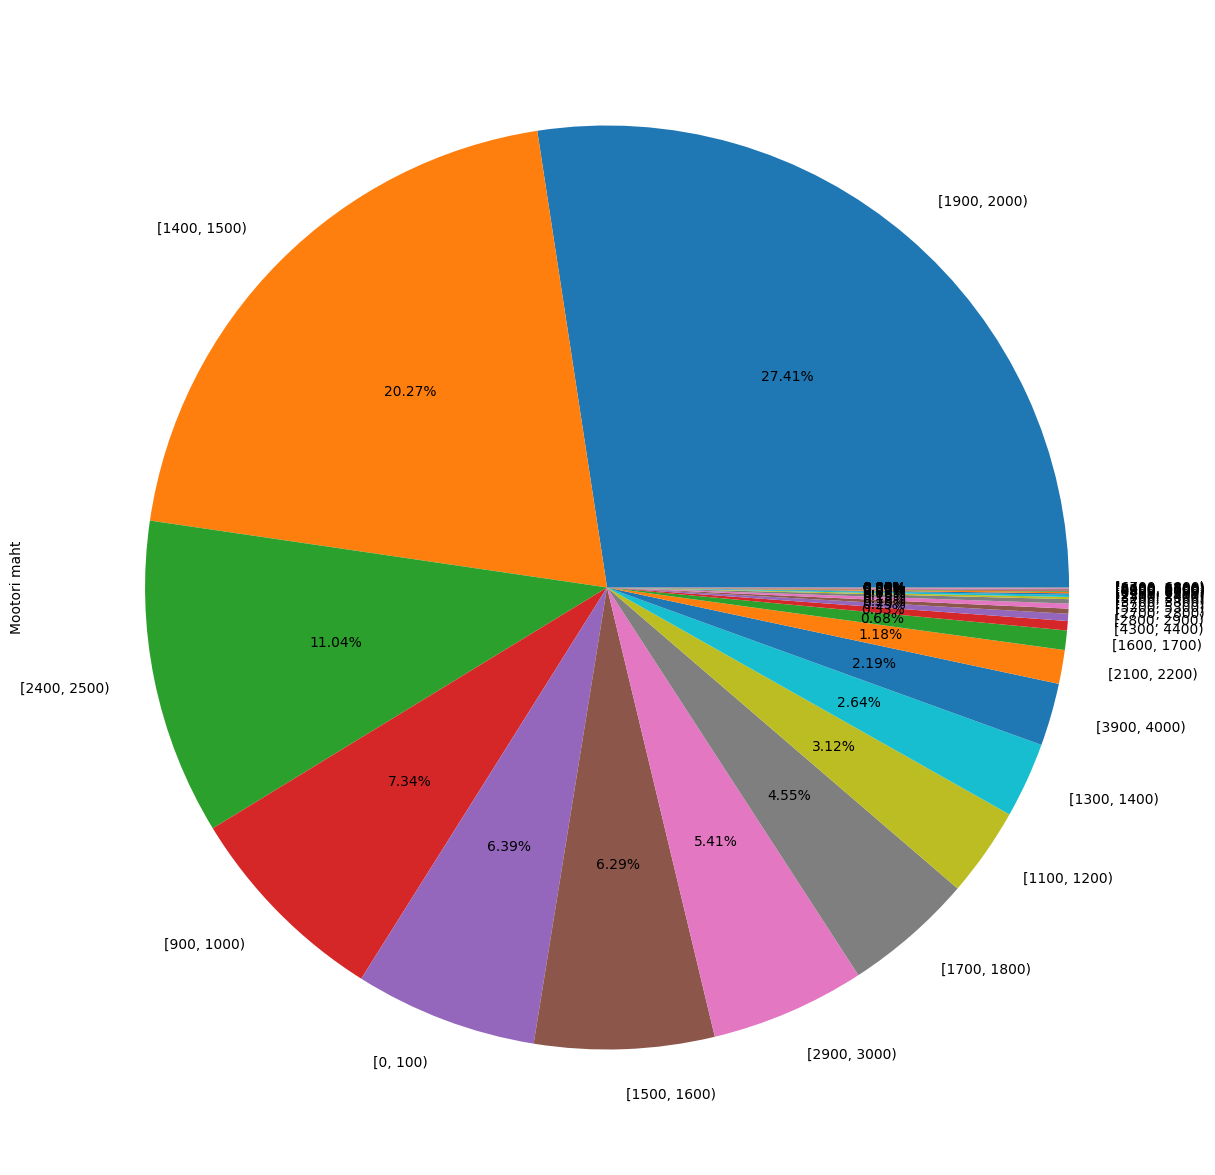

In [178]:
plt.figure(figsize=(15, 15))

bins = range(df["Mootori maht"].min(), df["Mootori maht"].max() + 100, 100)
capacities = pd.cut(df["Mootori maht"], bins, right=False).value_counts()
capacities.plot(kind="pie", autopct="%1.2f%%")
pass

# Top 10 popular manufacturers

             Mark  Arv
1          TOYOTA  945
2           SKODA  856
3             KIA  350
4      VOLKSWAGEN  295
5           DACIA  219
6          SUBARU  186
7         RENAULT  180
8            AUDI  179
9         PEUGEOT  157
10  MERCEDES-BENZ  147


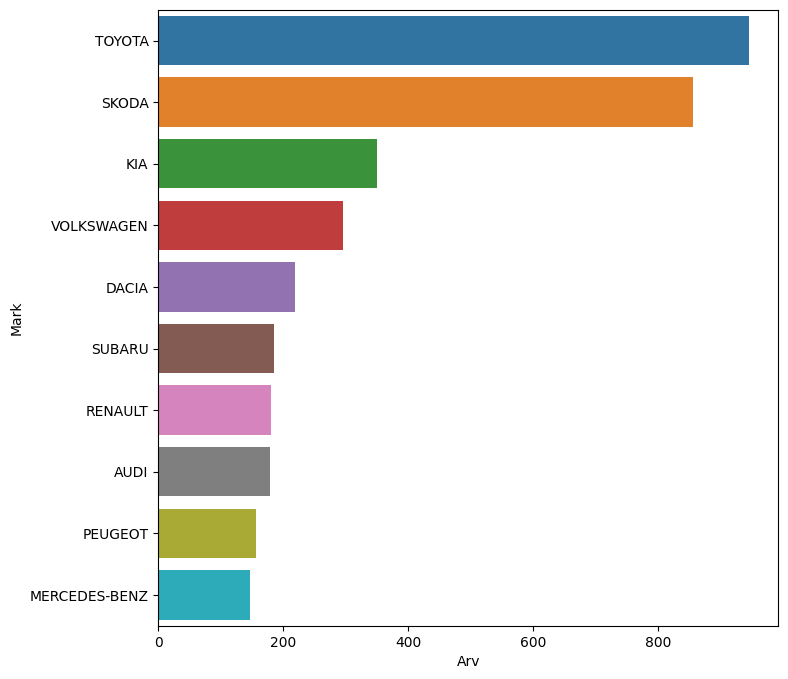

In [179]:
LIMIT = 10


def group_and_sort(data_frame, selection):
    return (
        data_frame.groupby(selection, as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )


def group_sort_and_plot(data_frame, selection, x="Arv", y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient="h")
    print(data.head(limit))


group_sort_and_plot(df, ["Mark"])

## Top 10 popular car models

            short name  Arv
1        SKODA OCTAVIA  342
2          TOYOTA RAV4  282
3       TOYOTA COROLLA  265
4         SKODA KODIAQ  245
5       SUBARU OUTBACK  141
6         DACIA DUSTER  138
7         KIA SPORTAGE  121
8   TOYOTA YARIS CROSS  120
9             KIA CEED  104
10        SKODA SUPERB   84


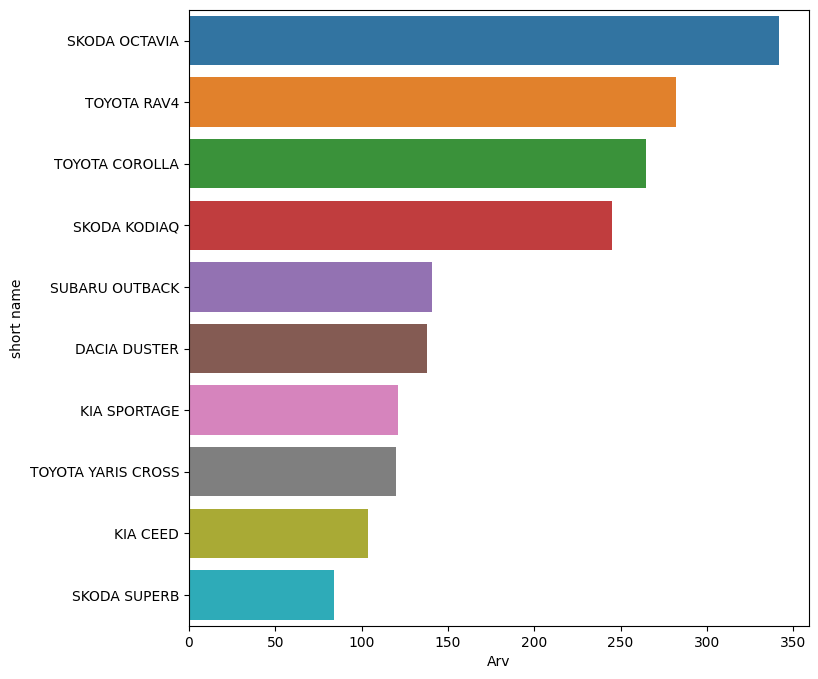

In [180]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

                  short name  Arv
1               SKODA KODIAQ  143
2              SKODA OCTAVIA  115
3               DACIA DUSTER   93
4               PEUGEOT 5008   38
5          VOLKSWAGEN TIGUAN   34
6   TOYOTA PROACE CITY VERSO   33
7               SKODA SUPERB   31
8              TOYOTA PROACE   31
9               KIA SPORTAGE   24
10        VOLKSWAGEN TOUAREG   24


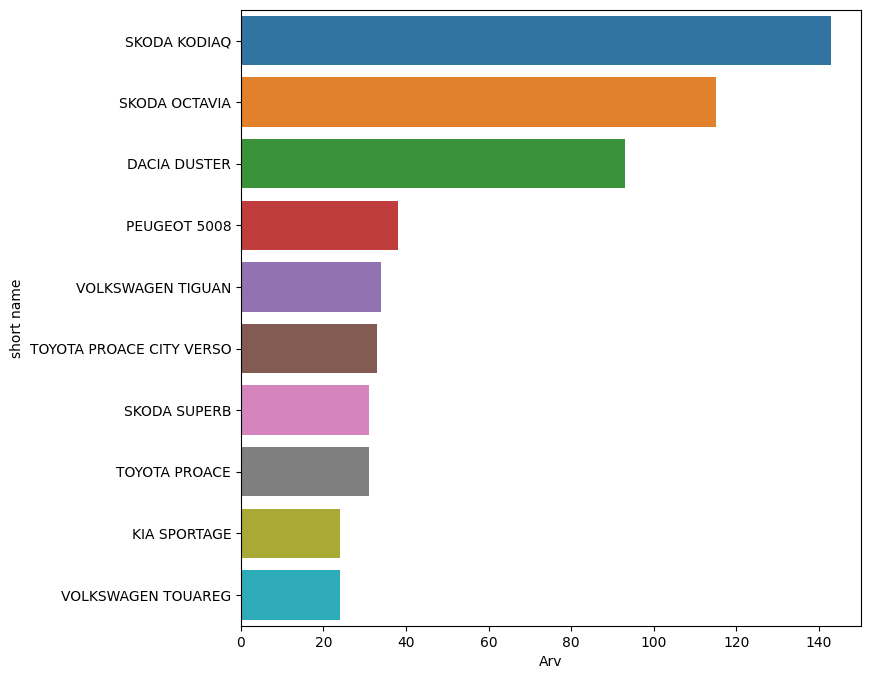

In [181]:
df_diesel = df[df["Mootori tüüp"].str.contains("DIISEL", case=False)]

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

           short name  Arv
1      SUBARU OUTBACK  141
2        SKODA KODIAQ  102
3            KIA CEED   91
4        RENAULT CLIO   60
5         SKODA KAMIQ   54
6         TOYOTA RAV4   54
7        SKODA SUPERB   46
8        DACIA DUSTER   45
9       DACIA SANDERO   44
10  VOLKSWAGEN TIGUAN   41


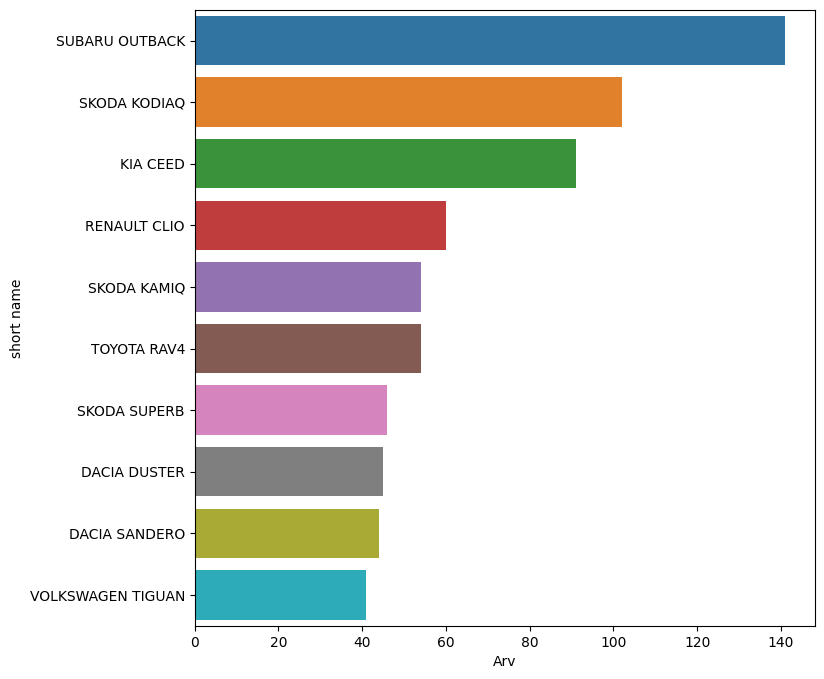

In [182]:
df_petrol = df[df["Mootori tüüp"].isin(["BENSIIN_KATALYSAATOR", "BENSIIN"])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


            short name  Arv
1       TOYOTA COROLLA  256
2          TOYOTA RAV4  228
3        SKODA OCTAVIA  190
4         KIA SPORTAGE  117
5   TOYOTA YARIS CROSS   88
6           HONDA CR-V   56
7       HYUNDAI TUCSON   55
8       NISSAN QASHQAI   51
9          TOYOTA C-HR   45
10        TOYOTA YARIS   41


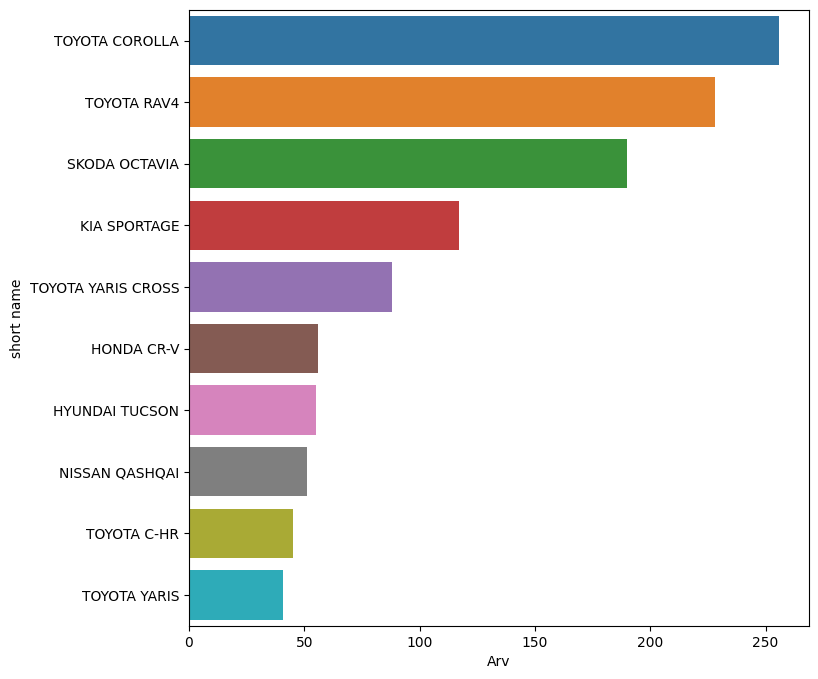

In [183]:
df_hybrids = df[df["Mootori tüüp"].str.contains("HYBRIID", case=False)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

                                        short name  Arv
1                                      TOYOTA BZ4X   34
2                                          AUDI Q8   31
3                                    TESLA MODEL 3   27
4                                    TESLA MODEL Y   19
5                                      SKODA ENYAQ   19
6   GREAT WALL MOTOR COMPANY LIMITED ORA FUNKY CAT   19
7                                     HYUNDAI KONA   14
8                                     DACIA SPRING   12
9                                          KIA EV6   11
10                                 VOLKSWAGEN ID.4   11


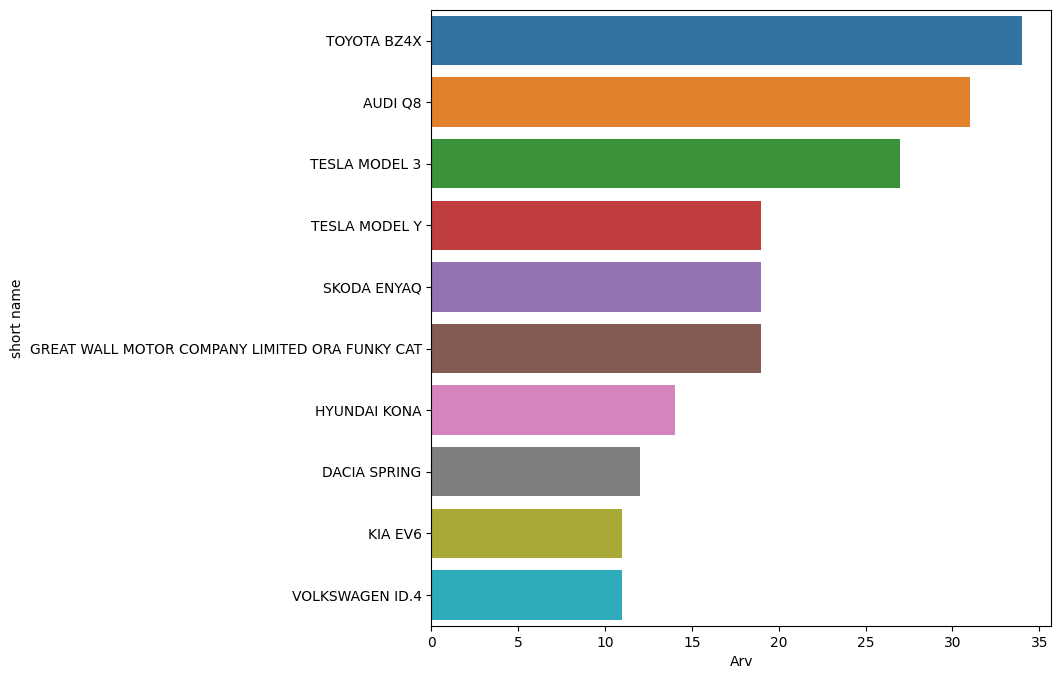

In [184]:
df_electric = df[df["Mootori tüüp"] == "ELEKTER"]

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

            short name  Arv
1          TOYOTA RAV4  168
2       TOYOTA COROLLA  151
3         SKODA KODIAQ  132
4        SKODA OCTAVIA  116
5   TOYOTA YARIS CROSS   89
6       SUBARU OUTBACK   87
7         KIA SPORTAGE   63
8         TOYOTA YARIS   52
9          SKODA KAMIQ   45
10   VOLKSWAGEN TIGUAN   39


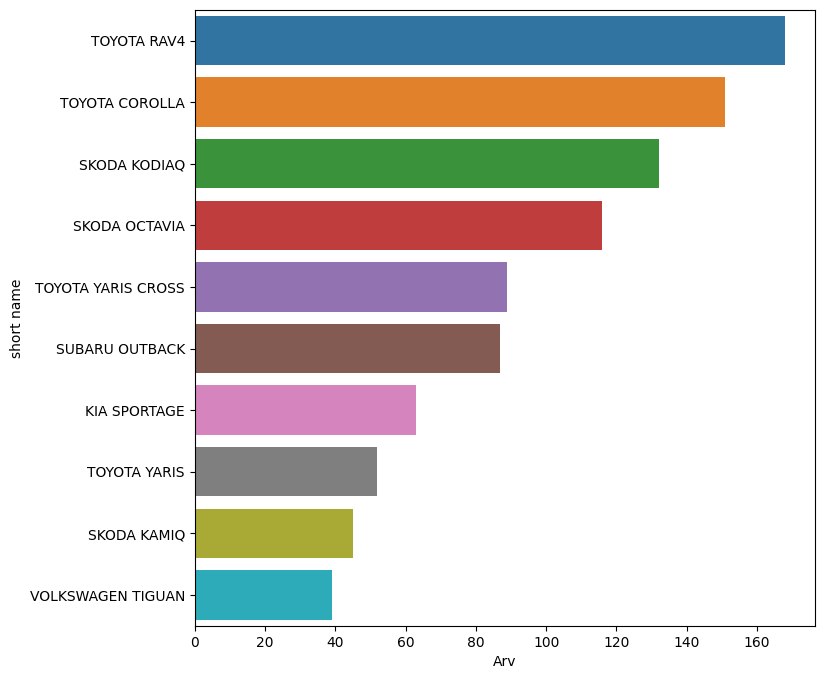

In [185]:
df_private = df[df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

        short name  Arv
1    SKODA OCTAVIA  226
2   TOYOTA COROLLA  114
3      TOYOTA RAV4  114
4     SKODA KODIAQ  113
5     DACIA DUSTER  107
6         KIA CEED   92
7     RENAULT CLIO   60
8     KIA SPORTAGE   58
9     SKODA SUPERB   56
10  SUBARU OUTBACK   54


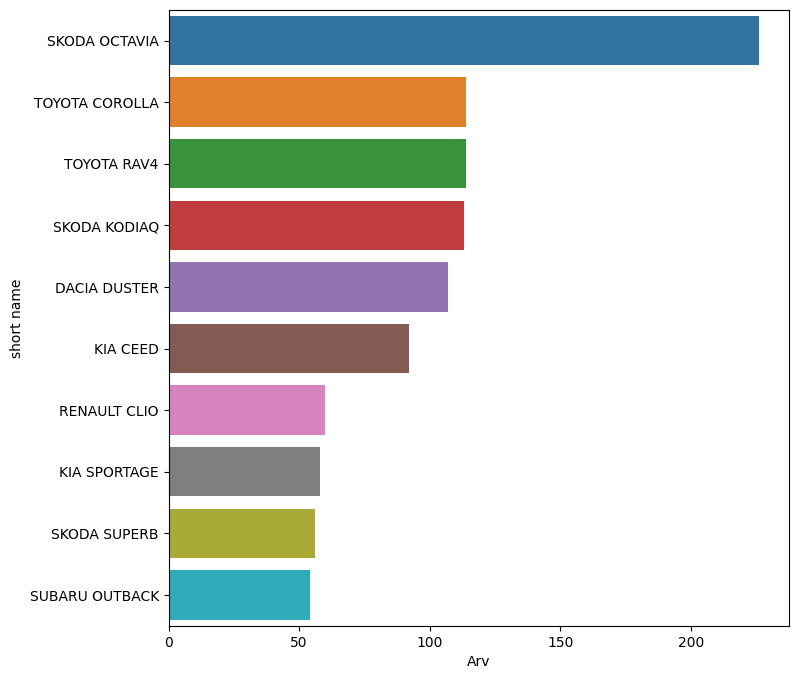

In [186]:
df_corporate = df[~df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV   Arv
non-SUV  False  2558
SUV       True  2186


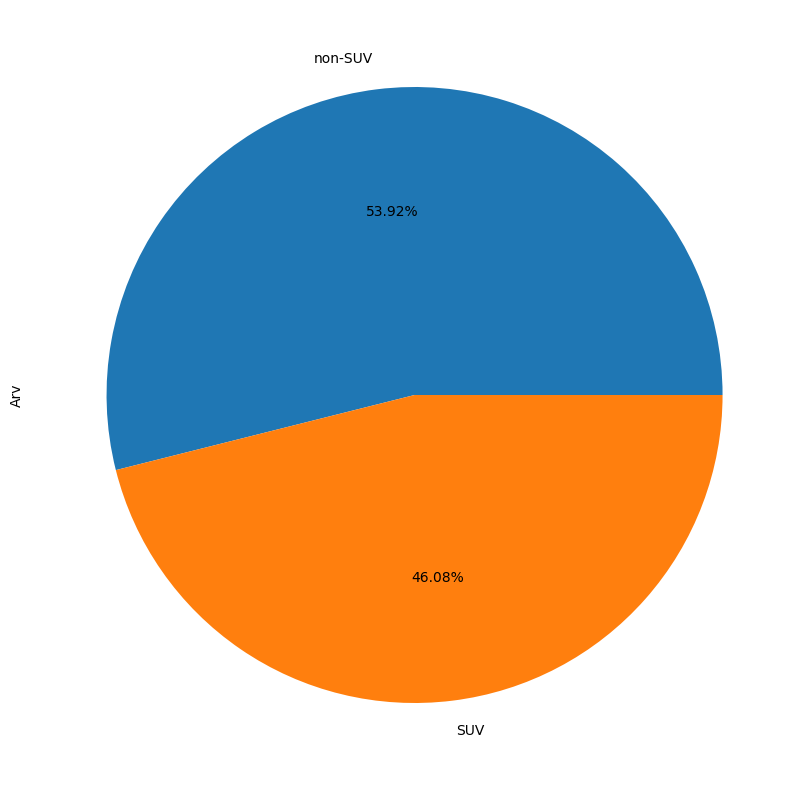

In [187]:
show_pie(df, "SUV", index=["non-SUV", "SUV"])

### Popular fuels in SUV

                      Arv
Mootori tüüp             
BENSIIN_HYBRIID       987
BENSIIN_KATALYSAATOR  545
DIISEL                431
ELEKTER               149
DIISEL_HYBRIID         74


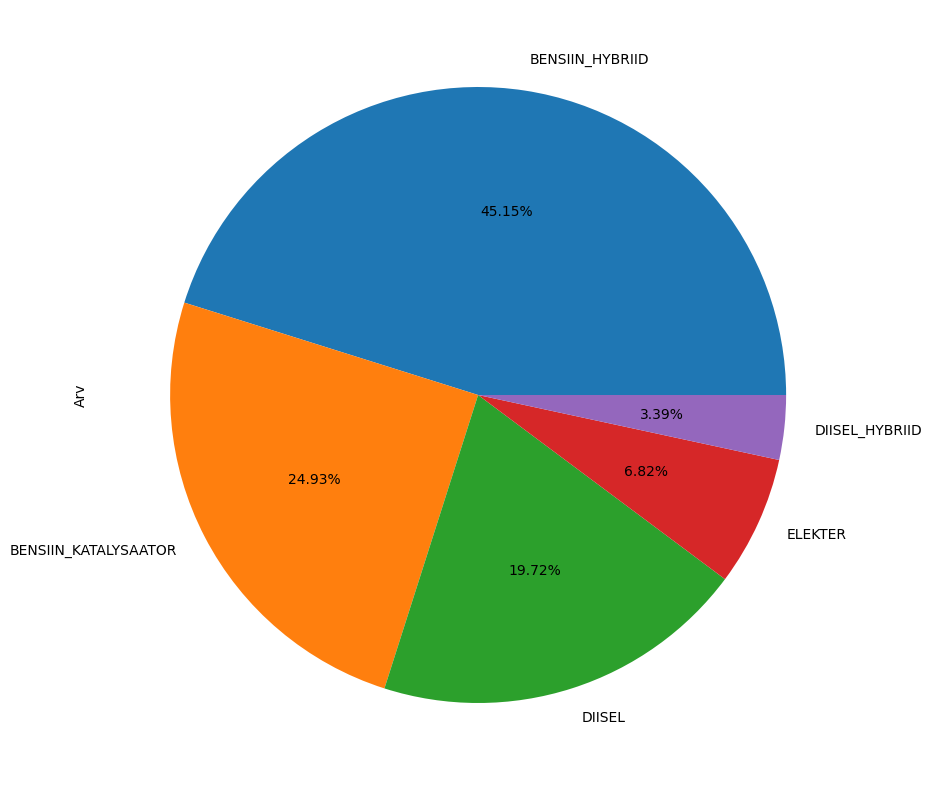

In [188]:
df_suv = df[df["SUV"]]

show_pie(df_suv, "Mootori tüüp")

### Top 10 popular SUV

            short name  Arv
1          TOYOTA RAV4  282
2         SKODA KODIAQ  245
3         DACIA DUSTER  138
4         KIA SPORTAGE  121
5   TOYOTA YARIS CROSS  120
6    VOLKSWAGEN TIGUAN   78
7         PEUGEOT 5008   63
8       HYUNDAI TUCSON   58
9           HONDA CR-V   56
10         SKODA KAMIQ   54


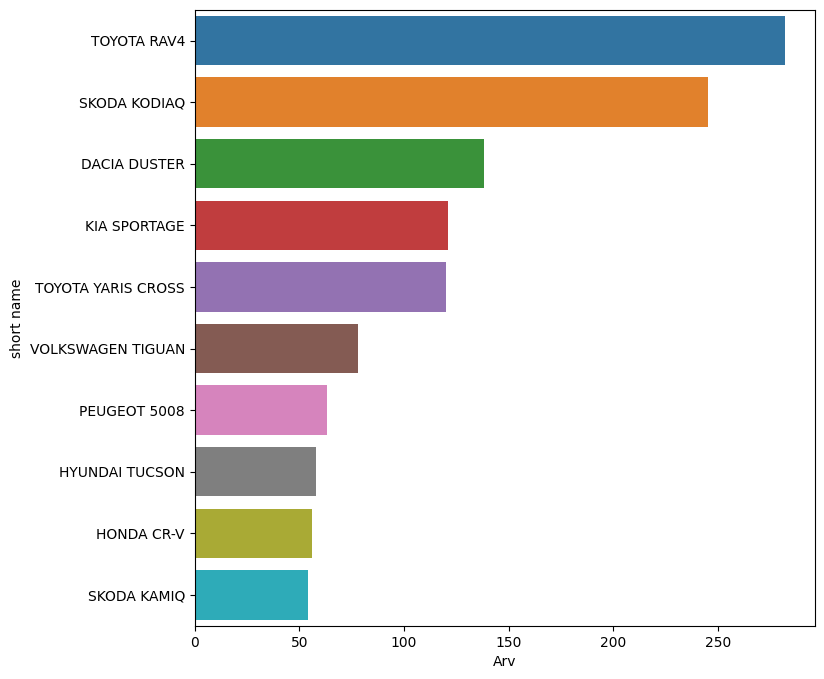

In [189]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

             short name  Arv
1          SKODA KODIAQ  143
2          DACIA DUSTER   93
3          PEUGEOT 5008   38
4     VOLKSWAGEN TIGUAN   34
5          KIA SPORTAGE   24
6    VOLKSWAGEN TOUAREG   24
7   CITROEN C5 AIRCROSS   19
8      VOLKSWAGEN T-ROC   19
9           KIA SORENTO   15
10          SKODA KAROQ   15


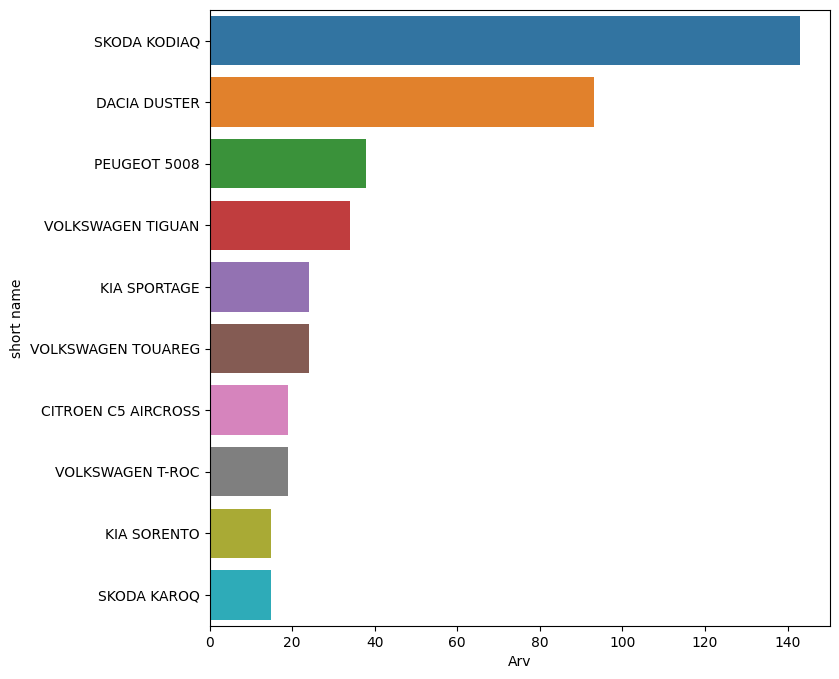

In [190]:
df_diesel_suv = df_diesel[df_diesel["SUV"]]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

            short name  Arv
1         SKODA KODIAQ  102
2          SKODA KAMIQ   54
3          TOYOTA RAV4   54
4         DACIA DUSTER   45
5    VOLKSWAGEN TIGUAN   41
6     VOLKSWAGEN TAIGO   34
7     VOLKSWAGEN T-ROC   33
8   TOYOTA YARIS CROSS   32
9          SKODA KAROQ   28
10  VOLKSWAGEN T-CROSS   18


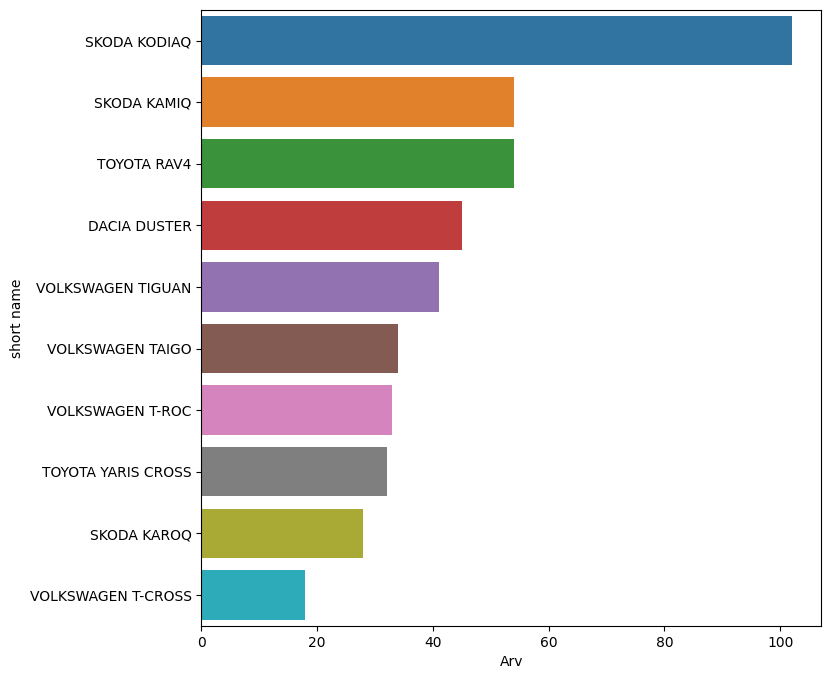

In [191]:
df_petrol_suv = df_petrol[df_petrol["SUV"]]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

            short name  Arv
1          TOYOTA RAV4  228
2         KIA SPORTAGE  117
3   TOYOTA YARIS CROSS   88
4           HONDA CR-V   56
5       HYUNDAI TUCSON   55
6       NISSAN QASHQAI   51
7          TOYOTA C-HR   45
8       NISSAN X-TRAIL   35
9      RENAULT AUSTRAL   34
10          VOLVO XC60   29


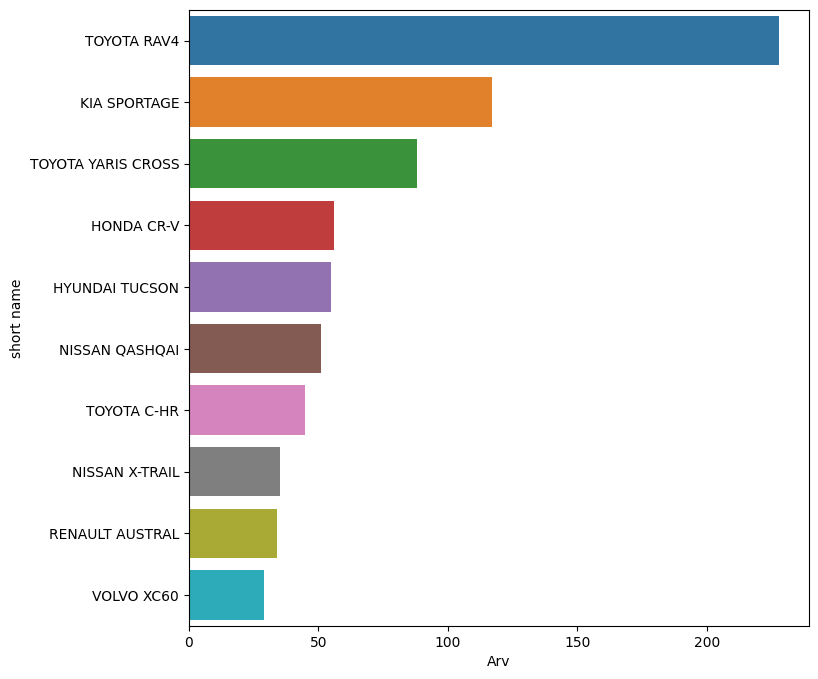

In [192]:
df_hybrid_suv = df_hybrids[df_hybrids["SUV"]]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [193]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(
        df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False
    )


Haapsalu
           short name  Arv
1        KIA SPORTAGE    4
2  TOYOTA YARIS CROSS    2
3            KIA CEED    2

Keila
           short name  Arv
1        SKODA KODIAQ    3
2  TOYOTA YARIS CROSS    3
3      SUBARU OUTBACK    2

Kohtla-Järve
     short name  Arv
1  SKODA KODIAQ    4
2   TOYOTA RAV4    3
3    HONDA CR-V    2

Loksa
      short name  Arv
1        AUDI Q5    1
2    NISSAN JUKE    1
3  SUZUKI VITARA    1

Maardu
      short name  Arv
1  SKODA OCTAVIA    8
2    TOYOTA RAV4    7
3  TOYOTA PROACE    3

Määramata
       short name  Arv
1   SKODA OCTAVIA  123
2  TOYOTA COROLLA  102
3    SKODA KODIAQ  101

Narva
     short name  Arv
1  SKODA KODIAQ    6
2   TOYOTA RAV4    4
3  KIA SPORTAGE    4

Narva-Jõesuu
       short name  Arv
1  TOYOTA COROLLA    2
2   HYUNDAI BAYON    1
3    PEUGEOT 3008    1

Paide
       short name  Arv
1  TOYOTA COROLLA    3
2    SKODA KODIAQ    2
3  SUBARU OUTBACK    2

Pärnu
      short name  Arv
1  SKODA OCTAVIA    9
2   SKODA KODIAQ    7
3  POR

# Top 3 for each mark

In [194]:
df_group = group_and_sort(df, ["Mark"])
marks = df_group.head(20)["Mark"].tolist()
df_group.set_index("Mark", inplace=True)

for mark in marks:
    models = df[df["Mark"] == mark]
    count = df_group.loc[mark, "Arv"]
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

TOYOTA total: 945
Top 3 TOYOTA models
           short name  Arv
1         TOYOTA RAV4  282
2      TOYOTA COROLLA  265
3  TOYOTA YARIS CROSS  120

SKODA total: 856
Top 3 SKODA models
      short name  Arv
1  SKODA OCTAVIA  342
2   SKODA KODIAQ  245
3   SKODA SUPERB   84

KIA total: 350
Top 3 KIA models
     short name  Arv
1  KIA SPORTAGE  121
2      KIA CEED  104
3   KIA PROCEED   38

VOLKSWAGEN total: 295
Top 3 VOLKSWAGEN models
          short name  Arv
1  VOLKSWAGEN TIGUAN   78
2   VOLKSWAGEN T-ROC   52
3   VOLKSWAGEN TAIGO   34

DACIA total: 219
Top 3 DACIA models
      short name  Arv
1   DACIA DUSTER  138
2  DACIA SANDERO   44
3   DACIA JOGGER   25

SUBARU total: 186
Top 3 SUBARU models
        short name  Arv
1   SUBARU OUTBACK  141
2  SUBARU FORESTER   18
3        SUBARU XV   17

RENAULT total: 180
Top 3 RENAULT models
        short name  Arv
1     RENAULT CLIO   63
2  RENAULT AUSTRAL   34
3   RENAULT CAPTUR   32

AUDI total: 179
Top 3 AUDI models
  short name  Arv
1    AUDI Q

# Top private diesel cars

                  short name  Arv
1               SKODA KODIAQ   64
2              SKODA OCTAVIA   63
3          VOLKSWAGEN TIGUAN   14
4               KIA SPORTAGE   13
5   TOYOTA PROACE CITY VERSO   12
6               SKODA SUPERB   11
7               DACIA DUSTER   10
8               PEUGEOT 5008    9
9               SEAT TARRACO    9
10               SKODA KAROQ    8


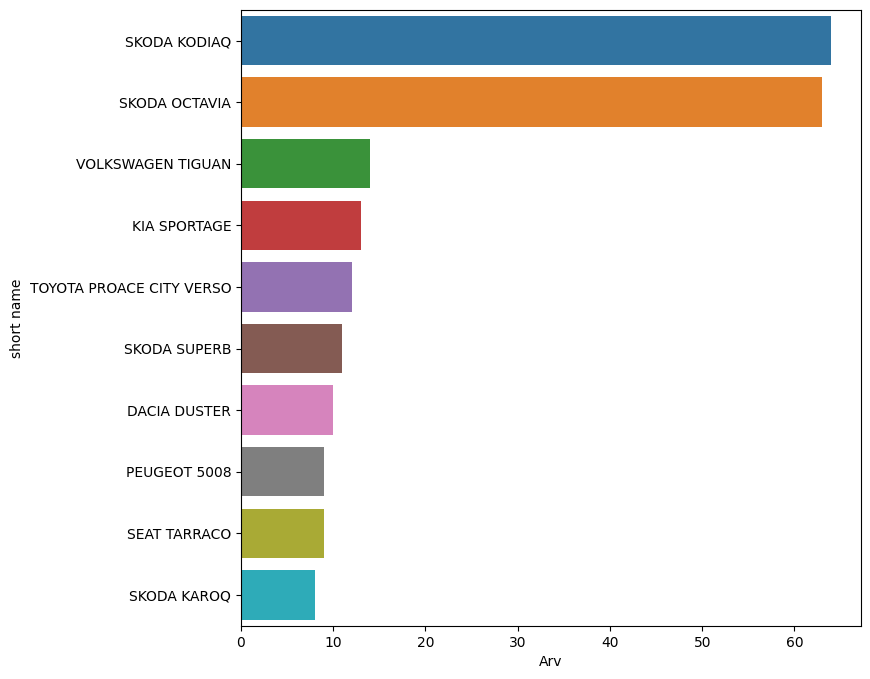

In [195]:
df_diesel_private_suv = df_diesel[
    df_diesel[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)
]

group_sort_and_plot(df_diesel_private_suv, [COLUMN_SHORT_NAME])